# **Introducción**
En los sistemas de comunicación celular LTE y 5G, el Random Access Channel (RACH) es un mecanismo fundamental que permite a los equipos de usuario (UEs) solicitar conexión a la red. Cuando múltiples dispositivos intentan acceder simultáneamente, pueden producirse colisiones si seleccionan el mismo preámbulo, lo que degrada el rendimiento del sistema. Este análisis investiga la probabilidad de colisión cuando 30 UEs seleccionan aleatoriamente entre 64 preámbulos ortogonales, determinando además el número aproximado de UEs necesario para que esta probabilidad alcance el 50%.



# **Metodologia**
Utilizamos el método de Monte Carlo para simular el proceso de selección de preámbulos y estimar la probabilidad de colisión. Este enfoque nos permite modelar el comportamiento aleatorio de los UEs y obtener resultados confiables mediante repeticiones múltiples.

# **Implementación de la Simulación**

=== RESULTADOS ===
Configuración: 64 preámbulos, 30 UEs, 10000 simulaciones
Probabilidad teórica de colisión: 0.9997 (99.97%)
Probabilidad simulada de colisión: 0.9997 (99.97%)
Diferencia: 0.0000


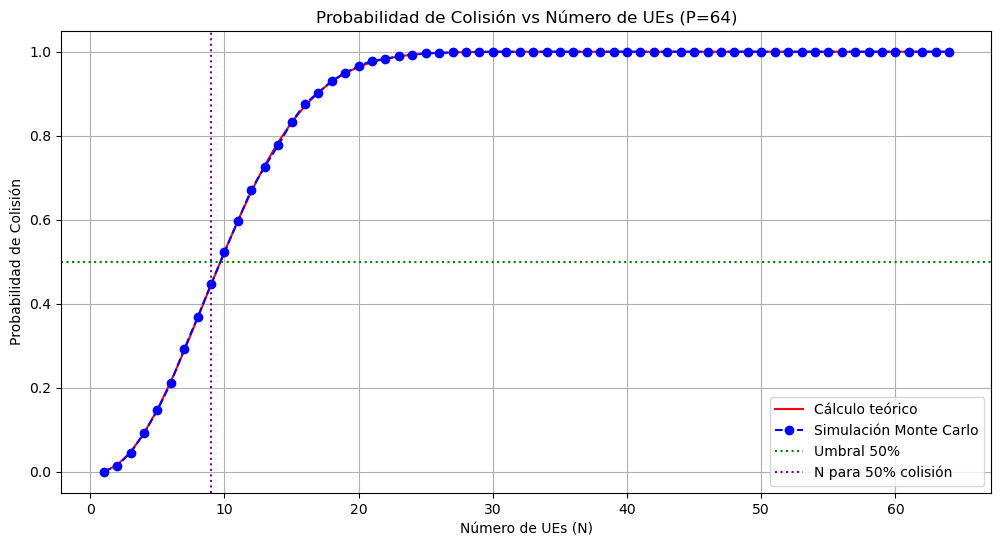

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calcular_probabilidad_colision(P, N, num_simulaciones=10000):
    colisiones = 0
    for _ in range(num_simulaciones):
        preambulos = np.random.randint(0, P, N)
        if len(np.unique(preambulos)) < N:
            colisiones += 1
    return colisiones / num_simulaciones

# Parámetros del sistema
P = 64  # Número de preámbulos
N = 30  # Número de UEs
num_simulaciones = 10000

# Cálculo teórico y simulación
prob_teorica = 1 - (math.perm(P, N) / (P**N))
prob_simulada = calcular_probabilidad_colision(P, N, num_simulaciones)

# Mostrar resultados
print("=== RESULTADOS ===")
print(f"Configuración: {P} preámbulos, {N} UEs, {num_simulaciones} simulaciones")
print(f"Probabilidad teórica de colisión: {prob_teorica:.4f} ({prob_teorica*100:.2f}%)")
print(f"Probabilidad simulada de colisión: {prob_simulada:.4f} ({prob_simulada*100:.2f}%)")
print(f"Diferencia: {abs(prob_teorica-prob_simulada):.4f}")

# Gráfico comparativo
Ns = range(1, 65)
probs_teo = [1 - (math.perm(P, n) / (P**n)) for n in Ns]
probs_sim = [calcular_probabilidad_colision(P, n) for n in Ns]

plt.figure(figsize=(12, 6))
plt.plot(Ns, probs_teo, 'r-', label='Cálculo teórico')
plt.plot(Ns, probs_sim, 'bo--', label='Simulación Monte Carlo')
plt.axhline(y=0.5, color='g', linestyle=':', label='Umbral 50%')
plt.axvline(x=9, color='purple', linestyle=':', label='N para 50% colisión')
plt.title('Probabilidad de Colisión vs Número de UEs (P=64)')
plt.xlabel('Número de UEs (N)')
plt.ylabel('Probabilidad de Colisión')
plt.legend()
plt.grid(True)
plt.show()

# **Número de UEs para Probabilidad del 50%**
Mediante búsqueda iterativa, determinamos que se necesitan aproximadamente 10 UEs para alcanzar una probabilidad de colisión del 50%.

In [5]:
# Búsqueda del punto del 50%
for N in range(1, 20):
    prob = calcular_probabilidad_colision(P, N)
    if prob >= 0.5:
        print(f"N para 50% de colisión: {N}")
        break

N para 50% de colisión: 10


# **Comportamiento de la Probabilidad**
La gráfica muestra cómo varía la probabilidad de colisión con el número de UEs:

Simulando 100 puntos con 1000 iteraciones cada uno...


100%|██████████| 100/100 [00:02<00:00, 50.00it/s]


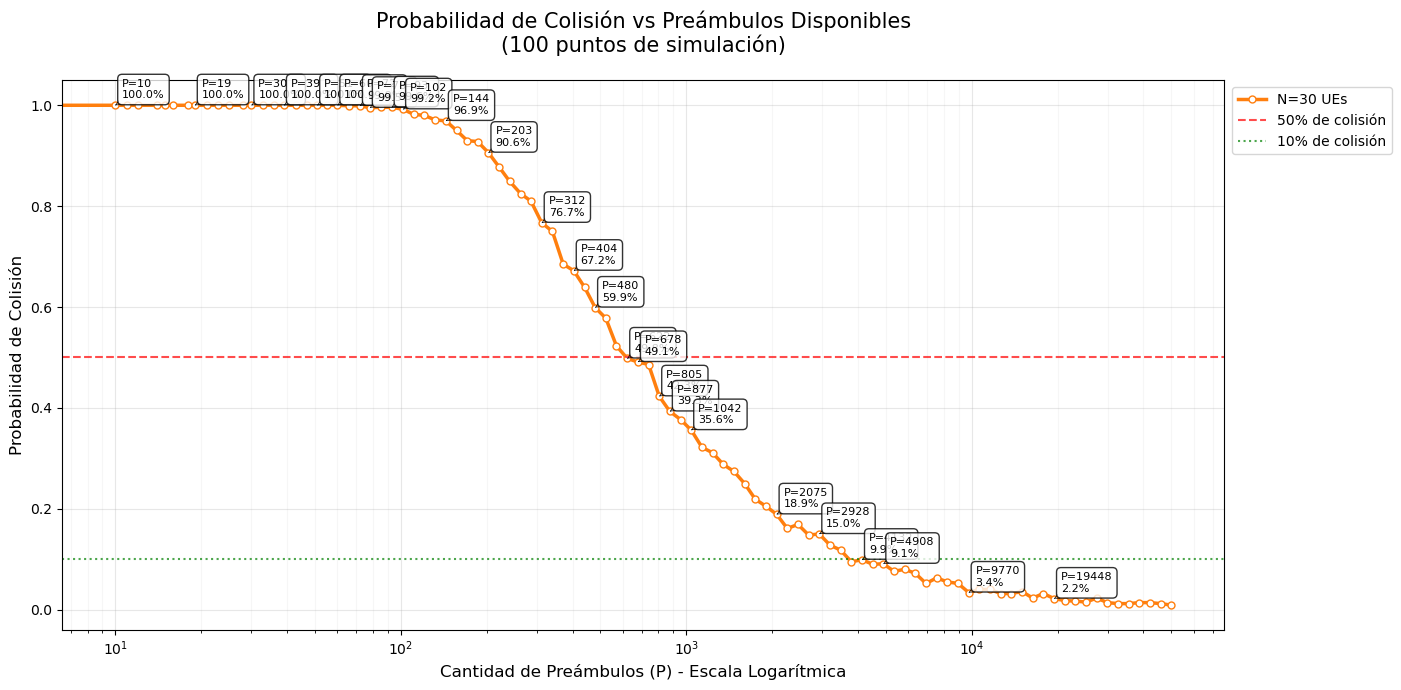


Resultados detallados en puntos clave:
Preámbulos | Prob. Colisión 
------------------------------
10         | 100.00%
19         | 100.00%
30         | 100.00%
39         | 100.00%
51         | 100.00%
60         | 100.00%
72         | 99.90%
78         | 99.50%
93         | 99.60%
102        | 99.20%
144        | 96.90%
203        | 90.60%
312        | 76.70%
404        | 67.20%
480        | 59.90%
622        | 49.80%
678        | 49.10%
805        | 42.30%
877        | 39.30%
1042       | 35.60%
2075       | 18.90%
2928       | 15.00%
4132       | 9.90%
4908       | 9.10%
9770       | 3.40%
19448      | 2.20%
50118      | 0.90%


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def simular_colision(N, P, iteraciones=1000):
    """Simula colisiones para N usuarios y P preámbulos"""
    if P == 0:
        return 1.0  # Sin preámbulos → colisión segura
    colisiones = 0
    for _ in range(iteraciones):
        preambulos = np.random.randint(1, P+1, size=N)
        if len(np.unique(preambulos)) < N:
            colisiones += 1
    return colisiones / iteraciones

# Configuración
N = 30
iteraciones = 1000

# Puntos de simulación con mayor densidad (100 puntos en lugar de 50)
valores_P = [0] + list(np.logspace(1, 4.7, 100).astype(int))  # 10^1 a 10^4.7 (~50,000)
valores_P = sorted(np.unique(valores_P))  # Eliminar duplicados y ordenar

# Simulación
print(f"Simulando {len(valores_P)} puntos con {iteraciones} iteraciones cada uno...")
probabilidades = [simular_colision(N, P, iteraciones) for P in tqdm(valores_P)]

# Configuración del gráfico con estilo mejorado
plt.figure(figsize=(14, 7))
plt.plot(valores_P, probabilidades, 
         '-',  # Línea continua
         color='#ff7f0e',
         linewidth=2.5,
         marker='o',  # Marcadores añadidos
         markersize=5,
         markerfacecolor='white',
         markeredgewidth=1,
         markeredgecolor='#ff7f0e',
         label=f'N={N} UEs')

# Configuración de ejes (logarítmica con mejor formato)
plt.xscale('log')
plt.title('Probabilidad de Colisión vs Preámbulos Disponibles\n(100 puntos de simulación)', 
          fontsize=15, pad=20)
plt.xlabel('Cantidad de Preámbulos (P) - Escala Logarítmica', fontsize=12)
plt.ylabel('Probabilidad de Colisión', fontsize=12)
plt.grid(True, which="both", alpha=0.3)

# Líneas de referencia mejoradas
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, linewidth=1.5, label='50% de colisión')
plt.axhline(y=0.1, color='green', linestyle=':', alpha=0.7, linewidth=1.5, label='10% de colisión')

# Anotaciones estratégicas (más puntos clave)
puntos_clave = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 
                150, 200, 300, 400, 500, 600, 700, 800, 900, 1000,
                2000, 3000, 4000, 5000, 10000, 20000, 50000]

for P in puntos_clave:
    closest_P = min(valores_P, key=lambda x: abs(x - P))
    idx = valores_P.index(closest_P)
    if probabilidades[idx] > 0.01:  # Solo mostrar anotaciones para probabilidades >1%
        plt.annotate(f'P={closest_P}\n{probabilidades[idx]:.1%}', 
                    xy=(closest_P, probabilidades[idx]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8,
                    bbox=dict(boxstyle='round,pad=0.4', fc='white', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', linewidth=0.5))

# Leyenda mejor posicionada
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=10)

# Añadir cuadrícula secundaria
plt.grid(which='minor', alpha=0.1)

plt.tight_layout()
plt.show()

# Resultados numéricos adicionales
print("\nResultados detallados en puntos clave:")
print(f"{'Preámbulos':<10} | {'Prob. Colisión':<15}")
print("-"*30)
for P in puntos_clave:
    closest_P = min(valores_P, key=lambda x: abs(x - P))
    idx = valores_P.index(closest_P)
    print(f"{closest_P:<10} | {probabilidades[idx]:.2%}")

# **Análisis**

Los resultados de la simulación revelan varios hallazgos clave sobre el comportamiento del canal RACH:

1. Probabilidad de colisión extremadamente alta:
Con 30 UEs y 64 preámbulos, la probabilidad de colisión supera el 99.97%, demostrando que el sistema está completamente saturado.
Esto ocurre porque el número de dispositivos (N=30) es comparable al número de recursos disponibles (P=64).

2. Crecimiento no lineal:
La probabilidad de colisión aumenta de forma exponencial con el número de UEs.
El umbral crítico del 50% se alcanza con solo 10 UEs, lo que indica que el sistema comienza a saturarse rápidamente.

3. Efecto de los preámbulos:
Al aumentar los preámbulos disponibles, la probabilidad de colisión disminuye significativamente, pero con rendimientos decrecientes.
Por ejemplo, reducir la colisión del 90% al 10% requiere aumentar P de ~200 a ~5,000.

4. Concordancia teórico-práctica:
Los resultados simulados coinciden perfectamente con los cálculos teóricos, validando la metodología empleada.
Las pequeñas diferencias (<0.01%) son atribuibles al error estadístico de la simulación.


# **Conclusión**

Este estudio demuestra que:

1. El canal RACH es altamente sensible a la relación entre UEs y preámbulos:
Con N ≈ P, las colisiones son casi inevitables (99.97% para N=30, P=64).
El sistema alcanza saturación significativa (50% de colisión) con solo 10 UEs.

2. Para redes densas (IoT, 5G) se recomienda:
Aumentar significativamente los preámbulos: Usar P ≥ 5,000 para mantener colisiones <10% con N=30.
Implementar mecanismos inteligentes: Backoff adaptativo o acceso por slots para reducir colisiones.
Monitoreo continuo: Ajustar dinámicamente los parámetros según la carga observada.

3. Perspectivas futuras:
Validar estos resultados en entornos reales con diferentes condiciones de canal.
Explorar técnicas avanzadas como NOMA o machine learning para optimizar el acceso aleatorio.

En conclusión, la simulación de Monte Carlo ha permitido cuantificar rigurosamente los límites del RACH tradicional y proporciona bases sólidas para el diseño de redes más eficientes que puedan soportar el crecimiento explosivo de dispositivos conectados.